In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(123)

In [2]:
x = np.linspace(-5,5,11)
print(x)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [3]:
error = np.random.normal(0,1,11) # create some errors
print(error)

[-0.09783943 -0.31462754 -1.30302005  0.79328573 -0.61649765 -1.42855948
 -1.49065764  0.91097981  1.02829943  0.25535362 -0.27759893]


In [4]:
y = 2*x + error
sd = np.ones(11)

<Container object of 3 artists>

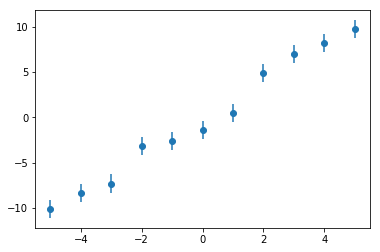

In [5]:
plt.errorbar(x,y,yerr=sd,fmt="o")

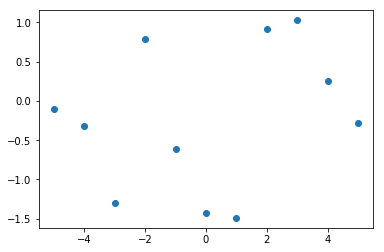

In [6]:
res = y - 2*x
plt.plot(x,res,"o")

In [7]:
p = np.polyfit(x,y,1)
print(p)

[ 2.07033012 -0.23098928]


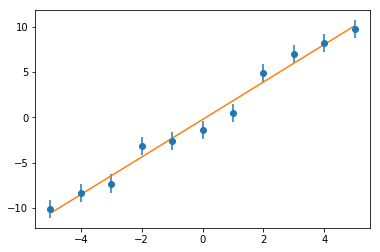

In [8]:
yfit = p[1] +p[0]*x
plt.errorbar(x,y,yerr=sd,fmt="o")
plt.plot(x,yfit)

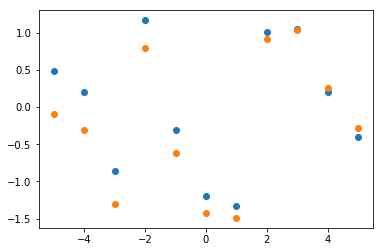

In [9]:
resfit = y - yfit
plt.plot(x,resfit,"o")
plt.plot(x,res,"o")

In [10]:
y2 = 2*x + 0.1*x**2 + np.random.normal(0,1,11)

In [11]:
p1 = np.polyfit(x,y2,1)
print(p1)

[ 1.9357232  1.6683067]


In [12]:
p2 = np.polyfit(x,y2,2)
print(p2)

[ 0.0530858   1.9357232   1.13744873]


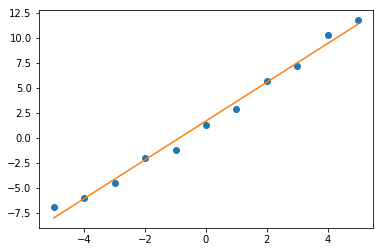

In [13]:
y2fit = p1[1] + p1[0]*x
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

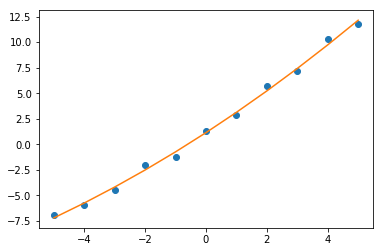

In [14]:
y2fit = p2[2] + p2[1]*x + p2[0]*x**2
plt.plot(x,y2,"o")
plt.plot(x,y2fit)

In [15]:
chisq_list = []
for i in range(1000):
    y=2*x +np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

(array([ 0.00814204,  0.03175395,  0.05618006,  0.08142038,  0.08386299,
         0.09200503,  0.10096127,  0.09200503,  0.07164994,  0.06757892,
         0.0431528 ,  0.02931134,  0.0219835 ,  0.01384146,  0.00569943,
         0.00651363,  0.        ,  0.00488522,  0.        ,  0.00325682]),
 array([  0.62682572,   1.85501942,   3.08321312,   4.31140681,
          5.53960051,   6.76779421,   7.99598791,   9.2241816 ,
         10.4523753 ,  11.680569  ,  12.9087627 ,  14.13695639,
         15.36515009,  16.59334379,  17.82153749,  19.04973118,
         20.27792488,  21.50611858,  22.73431228,  23.96250597,  25.19069967]),
 <a list of 20 Patch objects>)

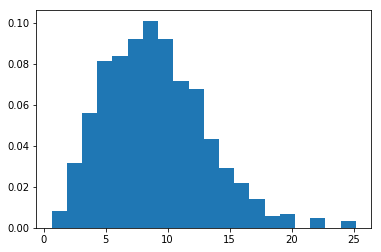

In [16]:
plt.hist(chisq,bins=20,normed=True)

In [17]:
print(chisq.mean())

8.97132695056


In [18]:
from scipy.stats import chi2

In [19]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,9)

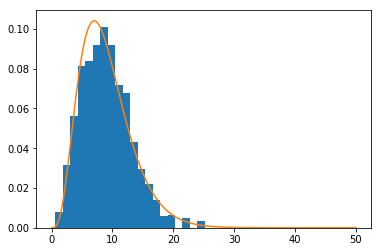

In [20]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [21]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,1)
    res = y-p[0]*x - p[1]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

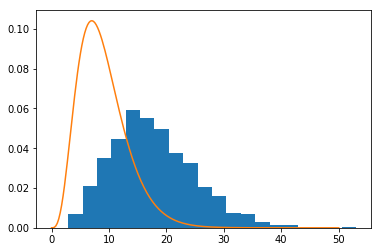

In [22]:
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

In [23]:
chisq_list = []
for i in range(1000):
    y=2*x +0.1*x**2+np.random.normal(0,1,11)
    p=np.polyfit(x,y,2)
    res = y-p[0]*x**2 - p[1]*x - p[2]
    chisq_list.append(np.sum(res**2))
chisq = np.array(chisq_list)

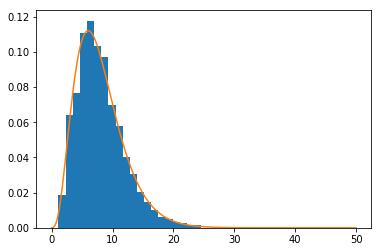

In [24]:
chi = np.linspace(0,50,200)
chi2distr = chi2.pdf(chi,8)
plt.hist(chisq,bins=20,normed=True)
plt.plot(chi,chi2distr)

(array([ 2.08674469,  0.32577738]), array([[  6.05429869e-03,   2.44552643e-19],
       [  2.44552643e-19,   6.05429869e-02]]))


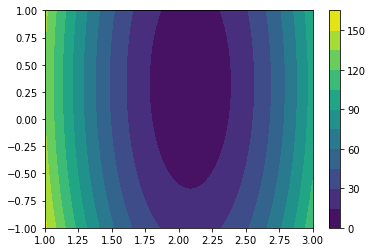

In [27]:
# let us plot the two-dimensional chi^2 distribution
m = np.linspace(1,3,401)
b = np.linspace(-1,1,401)

# calculate the two dimensional chi^2 matrix
def chi2linefit(m,b,datax,datay):
    res1 = m*datax[:,np.newaxis,np.newaxis]+b
    res2 = (y - res1.T).T
    res2 = res2**2
    chisquare = np.sum(res2,axis=0)
    return chisquare

x = np.linspace(-5,5,11)
y=2*x + np.random.normal(0,1,11)
print(np.polyfit(x,y,1,cov=True))
#print(x.shape,y.shape)


M,B = np.meshgrid(m,b)
#print(M.shape)
Z = chi2linefit2(M,B,x,y)
plt.contourf(M, B, Z,10)
plt.colorbar()

In [ ]:
# in the following cells, I am illustrating how I came up with the matrix calculation
m = np.array([[1,2],[3,4]])
m.shape

In [ ]:
x = np.array([1,2,3]).T
x = x[:,np.newaxis,np.newaxis]
print(x.shape)
y = np.array([4,6,8]).T[:,np.newaxis,np.newaxis]
print(y.shape)

In [ ]:
res2 = m*x
res2

In [ ]:
res12 = y - res2
print(res12)
print(res12.shape)
print(res12.T)

In [ ]:
b = np.array([[9,8],[6,5]])
print(b.shape)

In [ ]:
print((res12.T-b.T[:,:,np.newaxis]).T)